# Monthly Rain Reports


In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
import contextily as cx

from mergedownloader.inpeparser import INPE, INPEParsers, INPETypes
from mergedownloader.downloader import Downloader
from mergedownloader.utils import FileType
from rainreporter.reporter import Reporter

import rasterio as rio
import xarray as xr
from mergedownloader.utils import GISUtil

In [2]:
config_folder = Path('/workspaces/reports_folder/configs/')
assert config_folder.exists()

download_folder = Path('/workspaces/reports_folder/downloads')
assert download_folder.exists()

output_folder = Path('/workspaces/reports_folder/output')
assert output_folder.exists()

report_config = Path('/workspaces/RainReporter/reporter.json5')
assert report_config.exists()

bases_folder = Path('/workspaces/reports_folder/bases/')
assert bases_folder.exists()

In [3]:
reporter = Reporter(
    server=INPEParsers.FTPurl,
    download_folder=download_folder,
    config_file=report_config,
    bases_folder=bases_folder
)

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


## Create RS - Geojson

In [4]:
states = reporter.mapper.shapes['states']['gdf']

In [5]:
states

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,AREA_KM2,geometry
0,12,Acre,AC,Norte,164173.429,"POLYGON ((-68.79282 -10.99957, -68.79367 -10.9..."
1,13,Amazonas,AM,Norte,1559255.881,"POLYGON ((-56.76292 -3.23221, -56.76789 -3.242..."
2,15,Pará,PA,Norte,1245870.704,"MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ..."
3,16,Amapá,AP,Norte,142470.762,"MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ..."
4,17,Tocantins,TO,Norte,277423.627,"POLYGON ((-48.24830 -13.19239, -48.24844 -13.1..."
5,21,Maranhão,MA,Nordeste\n,329651.496,"MULTIPOLYGON (((-44.58680 -2.23341, -44.58696 ..."
6,22,Piauí,PI,Nordeste\n,251755.481,"POLYGON ((-42.47034 -3.48377, -42.46126 -3.484..."
7,23,Ceará,CE,Nordeste\n,148894.447,"POLYGON ((-37.87162 -4.36640, -37.87109 -4.367..."
8,24,Rio Grande do Norte,RN,Nordeste\n,52809.599,"MULTIPOLYGON (((-35.18728 -5.78987, -35.18707 ..."
9,25,Paraíba,PB,Nordeste\n,56467.242,"MULTIPOLYGON (((-34.79580 -7.17500, -34.79578 ..."


In [6]:
rs = states[states['SIGLA_UF'] == 'RS']

<Axes: >

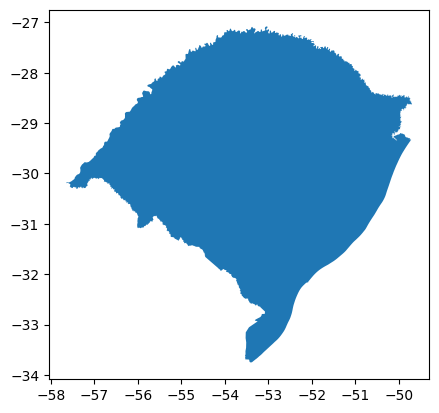

In [7]:
rs.plot()

In [8]:
# rs.to_file('/workspaces/reports_folder/bases/rs.geojson')

In [9]:
reporter.process_folder(
    input_folder=Path('/workspaces/reports_folder/hot_folder/'),
    output_folder=output_folder,
    hot=False
)

/usr/local/lib/python3.10/dist-packages/ecmwflibs/__init__.py:81: UserWarning: libglib-2.0.so.0: cannot open shared object file: No such file or directory
  warnings.warn(str(e))
